#計算機程式設計二
#第二週上課內容

###GitHub 教材參考資料

[https://github.com/htchen/i2p-nthu/tree/master/程式設計二/Linked Lists](https://github.com/htchen/i2p-nthu/blob/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%BA%8C/mid1/2-linked_list.md)


##Example 1
##Linked Lists

我們可以利用 C 語言的指標 (pointers)，將資料串起來，造出 linked list 這種資料結構。最標準的形式是 singly linked list，長得像底下這樣：

Singly linked list (from wikipedia)

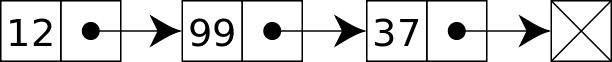

最後面的方框代表 `NULL`，用來標記 linked list 的結尾。

也可以讓最後一筆資料再接回開頭，形成環狀的結構，像底下這樣：

Circular linked list (from wikipedia)

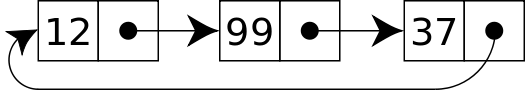

In [28]:
%%writefile Class02_01.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct t_List {
    int id;               // 4 bytes
    char str[10];         // 10 bytes
    struct t_List * next; // 8 byptes 
} List;

List* getData(void);      // read an input and create a list node to store that input
List* addToLast(List* head, List* np); // head-->n1-->n2-->...-->np-->.  append
List* removeFirst(List* head);
void showList(List* lst);
List* freeList(List* lst);
List* addToFirst(List* head, List* np);
List* removeLast(List* head);

List* getData(void)
{
    List* np;
    static int ID;

    np = (List *) malloc(sizeof(List));
    if (np!=NULL) {
        printf("Enter a name: ");
        if (scanf("%9s", np->str)==1) {
            np->id = ID++;
            np->next = NULL;
        } else {
            free(np);
            np = NULL;
        }
    }
    return np;
}

List* addToLast(List* head, List* np)
{
  List * q = head;
  if (head == NULL) return np;
  
  while (q->next != NULL) {
    q = q->next;
  }
  q->next = np;
  return head;
}

List* removeFirst(List* head)
{
  List *q;

  if (head == NULL) return NULL;

  q = head;
  head = head->next;
  free(q);
  return head;
}

void showList(List* lst)
{
  while (lst != NULL) {
    printf("{%d, %s, %p}-->", lst->id, lst->str, lst->next);
    lst = lst->next;
  }
  printf(".\n");
}

List* freeList(List* lst)
{
  while (lst != NULL) {
    lst = removeFirst(lst);
  }
  return NULL;
}

List* addToFirst(List* head, List* np)
{
  np->next = head;
  return np;
}

List* removeLast(List* head)
{
  List *q, *p;
  if (head == NULL) return NULL;
  if (head->next == NULL) {
    free(head);
    return NULL;
  }
  p = head;
  q = head->next;
  while (q->next != NULL) {
    p = q;
    q = q->next;
  }
  free(q);
  p->next = NULL;
  return head;
}

int main(void)
{
  List *head = NULL;
  List *np;

  showList(head);

  np = getData();
  head = addToLast(head, np);
  showList(head);

  np = getData();
  head = addToLast(head, np);
  showList(head);

  np = getData();
  head = addToFirst(head, np);
  showList(head);

  head = removeFirst(head);
  showList(head);

  head = removeLast(head);
  showList(head);

  head = removeLast(head);
  showList(head);

  head = removeLast(head);
  showList(head);

  return 0;
}


Overwriting Class02_01.c


In [29]:
%%shell
gcc Class02_01.c -o Class02_01
./Class02_01
 

.
Enter a name: Bob
{0, Bob, (nil)}-->.
Enter a name: Joe
{0, Bob, 0x555b36544040}-->{1, Joe, (nil)}-->.
Enter a name: Ken
{2, Ken, 0x555b36544020}-->{0, Bob, 0x555b36544040}-->{1, Joe, (nil)}-->.
{0, Bob, 0x555b36544040}-->{1, Joe, (nil)}-->.
{0, Bob, (nil)}-->.
.
.



#### Singly Linked List 實作

首先要定義底層的資料型態，假設我們想記錄的每一筆資料，都是由一個整數欄位和一個字串組成，在 C 語言裡面通常使用 `struct` 搭配 `typedef` 來達成，我們替它取個簡化的名字叫做 `List`。其中 `id` 和 `str` 都是要儲存的資料，`next` 則是指向 `List` 結構的指標。透過 `next` 我們就能讓每筆資料記住下一筆資料的位址，進而將所有的資料串連。

```c
typedef struct t_List {
	int id;
	char str[10];
	struct t_List* next;
} List;
```


定義了 `struct`，接下來就要想想看需要哪些函數，讓我們能對這樣的 linked list 做一些基本的操作，例如

```c
List* getData(void);
List* addToLast(List* head, List* np);
List* removeFirst(List* head);
void showList(List* lst);
List* freeList(List* lst);
```


#####讀取資料

首先要能夠讀取資料並存放到 `List` 裡面，我們把 `getData` 定成

```c
List* getData(void)
{
    List* np;
    static int ID;
	
    np = (List *) malloc(sizeof(List));
    if (np!=NULL) {
        printf("Enter a name: ");
        if (scanf("%9s", np->str)==1) {
            np->id = ID++;
            np->next = NULL;
        } else {
            free(np);
            np = NULL;
        }
    }
    return np;
}
```

主要是用 `malloc` 取得一塊足夠存放我們自定的 `struct` (也就是 `List`) 所需的空間，將這個空間的位址用指標變數 `np` 記住。如果 `malloc` 失敗了，無法取得空間，`np` 的值會是 `NULL`，這種情況就甚麼都不能做，直接 `return np`，也就是 `return NULL`。如果 `malloc` 確實能夠取得足夠的空間，則 `np` 的值不會是 `NULL`，而是取得的那塊記憶體的位址。因此，接下來就可以讀取資料，把資料存到 `struct` 的對應欄位中。假設我們讓使用者輸入一個長度不超過九個字元的字串，用 `scanf` 讀取並存到 `str` 欄位裡，如果使用者確實出入了一個合法的字串，我們就繼續設定其他欄位，包括 `id` 和 `next`。其中 `id` 的值是從 `static` 變數 `ID` 取得，`ID` 的值每次會增加一，而且由於 `ID` 是 `static` 變數，所以 `getData` 函數結束之後，`ID` 並不會消失，下次 `getData` 再被呼叫的時候，我們就可以繼續使用 `ID` 並取得當時保存的數值。至於 `next`，我們就先讓它指向 `NULL`。這樣後函數最後 `return np;` 就會把新產生的 `List` 的位址傳回去。

如果使用者不想輸入，按 `Ctrl-Z` `Enter` 結束，這種情況就應該把剛才用 `malloc` 取得的記憶體，再用 `free` 還回去，並且把 `np` 的值設為 `NULL`，表示沒有讀到任何資料。

順便回顧一下，`np->id` 也可以寫成 `(*np).id`，也就是先用 `*` 符號，取得指標記住的位址裡面所存放的 `struct` 資料，然後再用 `.` 符號取得對應的欄位。雖然兩種寫法都可以，但是一般都會採用 `np->id` 的寫法，比較簡潔。

#####在既有的 linked list 加入或移除資料

接下來我們來寫底下這兩個函數，分別是把一筆新的資料加入既有的 linked list 的最後面，以及把原有的 linked list 的第一筆資料移除。這種 linked list 運作方式很像排隊，所以通常稱作 queue。這裡只是舉例，當然也可已依照需求，用其他的規則加入資料，例如把資料加在 linked list 的開頭位置，移除時也從開頭移除，對應的程式寫法就稍有不同。我們主要只是要用這個例子，來示範如何調整指標，達到我們想要的加入或移除的效果。

```c
List* addToLast(List* head, List* np);
List* removeFirst(List* head);
```

先看看 `List* addToLast(List* head, List* np);` 該怎麼寫

```c
List* addToLast(List* head, List* np)
{
    List* ptr = head;
    if (head==NULL) {
        head = np;
    } else {
        while (ptr->next != NULL) {
            ptr = ptr->next;
        }
        ptr->next = np;
    }
    return head;
}
```

傳入的兩個參數都是指標，第一個指標 `head` 指向要被修改的 `List`，第二個指標 `np` 則是指向要被加入的資料，我們想將 `np` 所指到的資料加入 `head` 所指到的 `List` 的最後面。
1. 假如 `head` 是 `NULL`，也就是原本的 `List` 是空的，這種情況就讓 `head` 指向 `np` 所指的那筆資料，如此一來就有等於得到了一個 `List`，而且這個 `List` 只包含一筆資料。
2. 假如 `head` 所指到的 `List` 原本已經有資料，則要先從頭開始，走到 `List` 的最後，我們利用迴圈來達成
            while (ptr->next != NULL) {
                ptr = ptr->next;
一開始 `ptr = head`，然後持續做 `ptr = ptr->next`，讓指標移到下一筆資料所在的位址，當指標找到最後一筆資料，這時候 `ptr->next` 的值應該會是 `NULL`，所以迴圈可以停止，然後做 `ptr->next = np;` 把新的資料加在原有的最後一筆資料後面。(我們已經假定 `np->next` 會是 `NULL`，所以整個 `List` 經過 `addToLast` 後，仍然是一個具備正常結尾的 `List`。)
3. 最後做 `return head;`，將新增資料之後的 `List` 的開頭位址傳回去。

再來是 `List* removeFirst(List* head)`，將 `List` 的第一筆資料移除。 

```c
List* removeFirst(List* head)
{
    List *ptr;
    if (head == NULL) return NULL;
    else {
        ptr = head->next;
        free(head);
        return ptr;
    }
}
```

傳入的參數是 `List` 的開頭位址，傳回去的則是拿掉第一筆資料之後，剩下的 `List` 的開頭位址。
1. 如果原本的 `List` 是空的，就甚麼都不做，`return NULL;`
2. 否則 `List` 裡面至少有一筆資料，先用另一個指標 `ptr` 記住下一筆資料的位址 (下一筆資料的位址也有可能是 `NULL`；假如 `List` 裡只有一筆資料，則 `head->next` 會是 `NULL`)，做完 `ptr = head->next` 之後，就可以放心地把 `head` 所指到的那筆資料，透過呼叫 `free(head);` 移除。
3. 最後把 `ptr` 記住的位址傳回去，`return ptr;`，成為 `List` 的新的開頭位址。


#####顯示 linked list 的內容

接下來要寫的函數是 `void showList(List* lst);`
做法很簡單，只要用迴圈把整個 linked list 走過一遍，依序將每一筆資料的內容顯示出來就行了。

```c
void showList(List *lst)
{
	printf("[");
	while (lst != NULL) {
		printf("%d:%s,", lst->id, lst->str);
		lst = lst->next;
	}
	printf("]\n");
}
```

關鍵還是 `lst = lst->next;` 這句。

#####清除整個 linked list

利用前面已經寫好的 `removeFirst`

```c
List* freeList(List* lst)
{
    while (lst!=NULL) {
        lst = removeFirst(lst);
    }
    return NULL;
}
```




#####完整的成示範利及執行效果

######*程式碼*

In [ ]:
%%writefile E02_01.c

#include <stdio.h>
#include <stdlib.h>

typedef struct t_List {
    int id;
    char str[10];
    struct t_List* next;
} List;

List* getData(void);
List* addToLast(List* head, List* np);
List* removeFirst(List* head);
void showList(List* lst);
List* freeList(List* lst);

int main(void)
{
    List* head = NULL;
    List* np = NULL;

    while((np = getData()) != NULL) {
        head = addToLast(head, np);
        showList(head);
    }
    showList(head);
    head = removeFirst(head);
    showList(head);
    head = freeList(head);
    return 0;
}

List* getData(void)
{
    List* np;
    static int ID;

    np = (List *) malloc(sizeof(List));
    if (np!=NULL) {
        printf("Enter a name: ");
        if (scanf("%9s", np->str)==1) {
            np->id = ID++;
            np->next = NULL;
        } else {
            free(np);
            np = NULL;
        }
    }
    return np;
}

List* addToLast(List* head, List* np)
{
    List* ptr = head;
    if (head==NULL) {
        head = np;
    } else {
        while (ptr->next != NULL) {
            ptr = ptr->next;
        }
        ptr->next = np;
    }
    return head;
}

List* removeFirst(List* head)
{
    List *ptr;
    if (head==NULL) return NULL;
    else {
        ptr = head->next;
        free(head);
        return ptr;
    }
}

void showList(List *lst)
{
    printf("[");
    while (lst != NULL) {
        printf("%d:%s,", lst->id, lst->str);
        lst = lst->next;
    }
    printf("]\n");
}

List* freeList(List* lst)
{
    while (lst!=NULL) {
        lst = removeFirst(lst);
    }
    return NULL;
}

Writing E02_01.c


In [ ]:
%%shell
gcc E02_01.c -o E02_01
echo "Bob Alice Cathy" > input
./E02_01 < input

Enter a name: [0:Bob,]
Enter a name: [0:Bob,1:Alice,]
Enter a name: [0:Bob,1:Alice,2:Cathy,]
Enter a name: [0:Bob,1:Alice,2:Cathy,]
[1:Alice,2:Cathy,]




相關的函數前面都已經解釋過了，只剩下 `main` 要再稍微看看。其中讀取資料的方式是

```c
	while((np = getData()) != NULL) {
      head = addToLast(head, np);
      showList(head);
  }
```

每次把新的 `np` 加到原本的 `head` 所指到的 `List` 的最後面，然後再呼叫 `showList` 把目前的狀態顯示出來。
*有一個細節非常重要，必須特別注意*：在 `main` 的開頭 `List* head = NULL;`，一定要記得設定初值 `NULL`，因為之後呼叫 `addToLast` 會來當作判斷依據，如果沒有設定初值，程式會當掉

之後還有 `head = removeFirst(head);` 把第一筆資料移除，並且更新 `head` 指標。最後是

```c
    head = freeList(head);
```

將整個 `List` 清除，並且把 `head` 設為 `NULL` 表示是空的 `List`。

######*執行過程*

	Enter a name: amy
	[0:amy,]
	Enter a name: bob
	[0:amy,1:bob,]
	Enter a name: cathy
	[0:amy,1:bob,2:cathy,]
	Enter a name: danny
	[0:amy,1:bob,2:cathy,3:danny,]
	Enter a name: ^Z
	[0:amy,1:bob,2:cathy,3:danny,]
	[1:bob,2:cathy,3:danny,]

***

##Example 2

#### Circular Linked List 實作

Circular linked list 的最後一筆資料會再接回第一筆資料，而非指向 `NULL`。每次加入或移除資料之後，都必須保持 circurlar 的性質，不能讓 linked list 斷掉。

為了操作方便，除了既有的資料結構，我們另外定了一個 sentinel node，包含兩個指標 `first` 和 `last`，分別指向第一筆和最後一筆資料。

```c
typedef struct t_List {
	int id;
	char str[10];
	struct t_List* next;
} List;

typedef struct {
	List* first;
	List* last;
} Head;
```


需要定義的函數包括

```c
List* getData(void);
Head addToLast(Head head, List* np);
Head removeFirst(Head head);
void showList(Head head);
Head freeList(Head head);
```




#### Circular Linked List 實作

Circular linked list 的最後一筆資料會再接回第一筆資料，而非指向 `NULL`。每次加入或移除資料之後，都必須保持 circurlar 的性質，不能讓 linked list 斷掉。

為了操作方便，除了既有的資料結構，我們另外定了一個 sentinel node，包含兩個指標 `first` 和 `last`，分別指向第一筆和最後一筆資料。

```c
typedef struct t_List {
	int id;
	char str[10];
	struct t_List* next;
} List;

typedef struct {
	List* first;
	List* last;
} Head;
```


需要定義的函數包括

```c
List* getData(void);
Head addToLast(Head head, List* np);
Head removeFirst(Head head);
void showList(Head head);
Head freeList(Head head);
```


#####讀取資料

首先是 `getData`

```c
List* getData(void)
{
    List* np;
    static int id;
    np = (List *) malloc(sizeof(List));
    if (np!=NULL) {
        printf("Enter a name: ");
        if (scanf("%9s", np->str)==1) {
            np->id = id++;
            np->next = np;  // 這一行不一樣，指向自己而不是NULL
        } else {
            free(np);
            np = NULL;
        }
    }
    return np;
}
```

和 singly linked list 的版本只有一個地方不同，原本是 `np->next = NULL;` 改成 `np->next = np;`，這樣新產生的只有一筆資料的 `List`，`next` 指標指回自己。

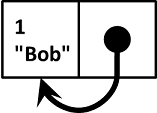


`main` 的內容如下

```c
int main(void)
{
    Head head = {NULL, NULL};
    List* np = NULL;

    //head.first = head.last = NULL;
    while((np = getData()) != NULL) {
        head = addToLast(head, np);
        showList(head);
    }
    showList(head);
    head = removeFirst(head);
    showList(head);
    head = freeList(head);
    return 0;
}
```

注意到 `Head head;`是一個一般的變數而不是指標，不過 `head` 包含的兩個欄位 `head.first` 和 `head.last` 都是指向 `List` 的指標。一開始必須手動把兩個指標都設定為 `NULL`，也就是 `head.first = head.last = NULL;`


In [ ]:
Head addToLast(Head head, List* np)
{
  if (head.last == NULL) {
      head.first = np;
      head.last = np;
  } else {
    np->next = head.first;
    (head.last)->next = np;
    head.last = np;
  }
  return head;
}

Head removeFirst(Head head)
{
    if (head.first != NULL) {
      if (head.first == head.last) {
        free(head.first);
        head.first = head.last = NULL;
      } else {
        head.first = (head.first)->next;
        free((head.last)->next);
        (head.last)->next = head.first;
    }
    return head;
}



#####在既有的 circular linked list 加入或移除資料

由於我們有兩個指標可以同時記住開頭和結尾，事情會變得簡單很多。先來看 `addToLast`：

```c
Head addToLast(Head head, List* np)
{
	if (head.last == NULL) {
    	head.first = head.last = np;
	} else {
    	np->next = head.first;
    	(head.last)->next = np;
    	head.last = np;
	}
	return head;
}
```

傳入的參數是 `head` 和 `np`。由於 `head` 裡面藏了兩個指標 `first` 和 `last`，我們利用這兩個指標就能輕鬆把 `np` 加入既有的 `List` 的結尾，並且維持原有的 circular 性質。

1. 如果傳入的 `head.last` 指標的值是 `NULL`，表示原本的 cirular linked list 是空的，這時候 `np` 就成了第一筆資料，同時也是最後一筆資料，因此 `head.first = head.last = np;`。
2. 否則原有的 circular linked list 已經有其他資料，那就要找到最後一筆資料，並將 `np` 接在其後。由於要維持 circular 性質，所以還必須讓 `np->next` 指向第一筆資料。我們用底下三行程式來達成
        	np->next = head.first;
        	(head.last)->next = np;
        	head.last = np;
    
---
用圖形表示上列步驟，

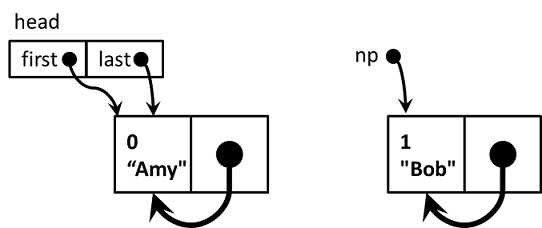

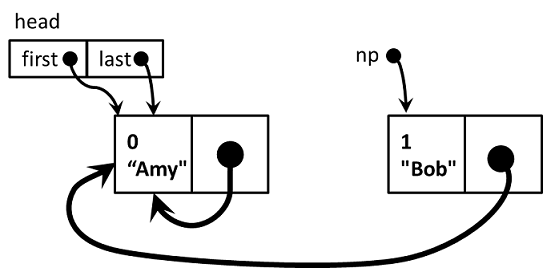

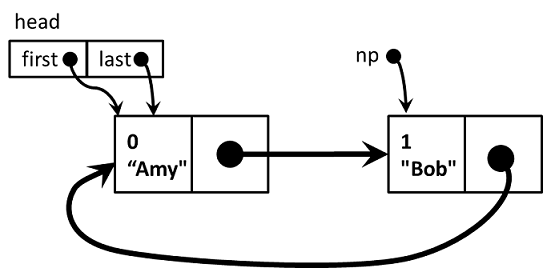

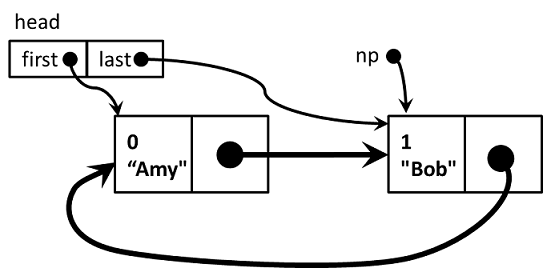


有了 `first` 和 `last`，把資料移除的做法也變得簡單許多。

```c
Head removeFirst(Head head)
{
    if (head.first != NULL)  {
        if (head.first == head.last) {
            free(head.first);
            head.first = head.last = NULL;
        } else {
            (head.last)->next = (head.first)->next;
            free(head.first);
            head.first = (head.last)->next;
        }
    }
    return head;
}
```

1. 如果 `head.first` 不是 `NULL` 才有移除的必要，否則就直接 `return head;`
2. 接下來分成兩種情況：
2.1 如果只有一筆資料，也就是 `head.first == head.last`，就把那筆資料移除，`free(head.first)`。移除之後，`List` 變成空的，所以要設定 `head.first = NULL;` 而且 `head.last = NULL;`。最後會把更新過後的 `head` 傳回去。
2.2 如果有超過一筆資料，則 `head.first` 和 `head.last` 會各自指向不同的地方，這時候的移除需要三個步驟，順序不能亂掉，否則會遺失需要的資訊。
                (head.last)->next = (head.first)->next;
                free(head.first);
                head.first = (head.last)->next;
2.2.1 先是把 `(head.last)->next` (原本只到第一筆資料)，改成指向第二筆資料。第二筆資料的位址可以用 `(head.first)->next` 取得。
2.2.2 再來就可以把第一筆資料去掉，`free(head.first);`
2.2.3 然後更新 `head.first`，讓它指向原本的第二筆資料 (現在變成了第一筆資料)，該筆資料的位址我們剛才已經用 `(head.last)->next` 記住。

上述的步驟就不再用圖形來說明，但是大家可以自己試著畫畫看，對於理解操作流程會有幫助。

#####顯示 linked list 的內容
```c
void showList(Head head)
{
    List* lst = head.first;
    if (lst==NULL) printf("[]\n");
    else {
        printf("[");
        do {
            printf("%d:%s,", lst->id, lst->str);
            lst = lst->next;
        } while (lst != head.first);
        printf("]\n");
    }
}
```


#####清除整個 linked list
```c
Head freeList(Head head)
{
    while (head.first != NULL) {
        head = removeFirst(head);
    }
    return head;
}
```

完整的程式碼就不再貼出來占空間。如果想要測試，只要把上面程式碼片段整合在一起，一併編譯就行了。程式的執行結果和 singly linked list 版本相同。


####將資料和 linked list 分開儲存

最後再補上一個範例，用 linked list 來實作以 cons 方式構成的 list。在這個例子中，我們將資料和 linked list 分開儲存，另外用指標指向實際資料所在位址。由於時間的關係，這個例子應該不會在上課的時候講解，有興趣請自行研究。不過，無論如何，前面兩個例子，singly linked list 以及 circular linked list，一定要搞懂，而且要能夠自己寫出來才行。

In [ ]:
%%writefile E02_02.c
#include <stdio.h>
#include <stdlib.h>

typedef struct {
    int id;
    char str[10];
} Node;

typedef struct t_List {
    Node* data;              // 透過指標，記住資料所在位址
    struct t_List* next;
} List;

Node* createNode(void);      // 用來產生資料
List* cons(Node* nodep, List* lst);   // cons 將資料加在 List 最前面   cons head tail
void showList(List* lst);
void freeList(List* lst);
Node* head(List* lst);       // 取得 List 第一筆資料
List* tail(List* lst);       // 取得扣除第一筆資料之後 剩下的 List

int main(void)
{
    Node* np = NULL;
    List* lst = NULL;

    while((np = createNode()) != NULL) {
        lst = cons(np, lst);  // 不斷用 cons 把新讀取的資料加在既有的 List 前面
        showList(lst);
    }
    showList(lst);

    printf("%d: %s\n", head(lst)->id, head(lst)->str);
    showList(tail(lst));
    freeList(lst);
    return 0;
}

Node* createNode(void)
{
    Node* nodep;
    static int id;

    nodep = (Node *) malloc(sizeof(Node));
    if (nodep!=NULL) {
        printf("Enter a name: ");
        if (scanf("%9s", nodep->str)==1) {
            nodep->id = id++;
        } else {
            free(nodep);
            nodep = NULL;
        }
    }
    return nodep;
}

List* cons(Node* nodep, List* lst)
{
    List* hp;
    if (nodep==NULL) return lst;
    else {
        hp = (List*) malloc(sizeof(List));   // 產生一個 List 結構  並且用指標 hp 記住位址
        hp->data = nodep;                    // 把其中的 data 指標指向 nodep 這筆資料
        hp->next = lst;                      // 把 next 指標指向 既有的 lst
        return hp;                           // 把 hp 所記住的位址傳回去
    }
}

void showList(List *lst)
{
    printf("[");
    while (lst != NULL) {
        printf("%d:%s,", lst->data->id, lst->data->str);
        lst = lst->next;
    }
    printf("]\n");
}

void freeListHelper1(List* lst)
{
    while (lst != NULL) {
        if (lst->data != NULL) {
            free(lst->data);
            lst->data = NULL;
        }
        lst = lst->next;
    }
}

void freeListHelper2(List* lst)
{
    if (lst == NULL) return;
    else {
        freeListHelper2(lst->next);
        free(lst);
    }
}

void freeList(List* lst)
{
    freeListHelper1(lst);   // free 要分成兩步驟， 先把 List 裡面記住的每筆資料清除
    freeListHelper2(lst);   // 再把 List 本身清除
}

Node* head(List *lst)
{
    if (lst != NULL)
        return lst->data;
    else
        return NULL;
}

List* tail(List *lst)
{
    if (lst != NULL)
        return lst->next;
    else
        return NULL;
}

Writing E02_02.c


In [ ]:
%%shell
gcc E02_02.c -o E02_02
./E02_02


Enter a name: BB
[0:BB,]
Enter a name: EE
[1:EE,0:BB,]
Enter a name: 



 


CalledProcessError: ignored